In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [98]:
customer_data = pd.read_csv('CustomerDemographics.csv')

In [99]:
customer_data

,Customer ID,Country
0,13085,United Kingdom
1,13078,United Kingdom
2,15362,United Kingdom
3,18102,United Kingdom
4,12682,France
5,18087,United Kingdom
6,13635,United Kingdom
7,14110,United Kingdom
8,12636,USA
9,17519,United Kingdom


In [100]:
product_data = pd.read_csv('ProductInfo.csv')

In [101]:
product_data

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
8813,22962,Mailout
8814,22734,amendment
8815,22962,NaN
8816,22960,NaN


In [102]:
product_data.shape

(8818, 2)

In [103]:
transactional_data_1 = pd.read_csv('Transactional_data_retail_01.csv')

In [104]:
transactional_data_1.shape

(525461, 6)

In [105]:
transactional_data_1

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,01 December 2021
1,489434,79323P,12,6.75,13085.0,01 December 2021
2,489434,79323W,12,6.75,13085.0,01 December 2021
3,489434,22041,48,2.10,13085.0,01 December 2021
4,489434,21232,24,1.25,13085.0,01 December 2021
...,...,...,...,...,...,...
525456,538171,22271,2,2.95,17530.0,09 December 2022
525457,538171,22750,1,3.75,17530.0,09 December 2022
525458,538171,22751,1,3.75,17530.0,09 December 2022
525459,538171,20970,2,3.75,17530.0,09 December 2022


In [106]:
transactional_data_2 = pd.read_csv('Transactional_data_retail_02.csv')

In [107]:
transactional_data_2.shape

(541910, 6)

In [108]:
transactional_data_2

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,536365,85123A,6,2.55,17850.0,01-12-2022
1,536365,71053,6,3.39,17850.0,01-12-2022
2,536365,84406B,8,2.75,17850.0,01-12-2022
3,536365,84029G,6,3.39,17850.0,01-12-2022
4,536365,84029E,6,3.39,17850.0,01-12-2022
...,...,...,...,...,...,...
541905,581587,22899,6,2.10,12680.0,09-12-2023
541906,581587,23254,4,4.15,12680.0,09-12-2023
541907,581587,23255,4,4.15,12680.0,09-12-2023
541908,581587,22138,3,4.95,12680.0,09-12-2023


In [109]:
transactional_data_1[['StockCode','Price']]

,StockCode,Price
0,85048,6.95
1,79323P,6.75
2,79323W,6.75
3,22041,2.10
4,21232,1.25
...,...,...
525456,22271,2.95
525457,22750,3.75
525458,22751,3.75
525459,20970,3.75


In [110]:
transactional_data_2['Price']

0          2.55
1          3.39
2          2.75
3          3.39
4          3.39
          ...  
541905     2.10
541906     4.15
541907     4.15
541908     4.95
541909    18.00
Name: Price, Length: 541910, dtype: float64

In [111]:
transactional_data_2['StockCode'].is_unique

False

In [112]:
transactional_data_2['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
20738        1
62095B       1
72814        1
84967B       1
84546        1
Name: count, Length: 4070, dtype: int64

In [113]:
# duplicate 
duplicates = transactional_data_2[transactional_data_2.duplicated(subset=['StockCode', 'InvoiceDate'], keep=False)]
print(duplicates)


       Invoice StockCode  Quantity  Price  Customer ID InvoiceDate
0       536365    85123A         6   2.55      17850.0  01-12-2022
1       536365     71053         6   3.39      17850.0  01-12-2022
2       536365    84406B         8   2.75      17850.0  01-12-2022
3       536365    84029G         6   3.39      17850.0  01-12-2022
4       536365    84029E         6   3.39      17850.0  01-12-2022
...        ...       ...       ...    ...          ...         ...
541902  581587     22629        12   1.95      12680.0  09-12-2023
541905  581587     22899         6   2.10      12680.0  09-12-2023
541907  581587     23255         4   4.15      12680.0  09-12-2023
541908  581587     22138         3   4.95      12680.0  09-12-2023
541909  581587      POST         1  18.00      12680.0  09-12-2023

[382956 rows x 6 columns]


In [114]:
# Customer Summary Stats
customer_summary = customer_data.describe(include='all')
print("Customer Summary Statistics:")
print(customer_summary)


Customer Summary Statistics:
         Customer ID         Country
count      49.000000              49
unique           NaN               6
top              NaN  United Kingdom
freq             NaN              42
mean    15299.020408             NaN
std      1932.264803             NaN
min     12362.000000             NaN
25%     13705.000000             NaN
50%     15311.000000             NaN
75%     17511.000000             NaN
max     18102.000000             NaN


In [115]:
# Item Summary Statis
product_summary = product_data.describe(include='all')
print("\nProduct Summary Statistics:")
print(product_summary)




Product Summary Statistics:
       StockCode Description
count       8818        6367
unique      5152        5697
top        20713       check
freq           9         146


In [120]:
#standardize date format
def standardize_date(date_str):
    try: 
        return pd.to_datetime(date_str, format='%d %B %Y')
    except ValueError:
        try:
          
            return pd.to_datetime(date_str, format='%d-%m-%Y')
        except ValueError:
           
            return pd.NaT

transactional_data_1['InvoiceDate'] = transactional_data_1['InvoiceDate'].apply(standardize_date)
transactional_data_2['InvoiceDate'] = transactional_data_2['InvoiceDate'].apply(standardize_date)

invalid_dates_1 = transactional_data_1[transactional_data_1['InvoiceDate'].isna()]
invalid_dates_2 = transactional_data_2[transactional_data_2['InvoiceDate'].isna()]

if not invalid_dates_1.empty:
    print("Invalid dates in Transactional_data_retail_01:")
    print(invalid_dates_1.head())
if not invalid_dates_2.empty:
    print("Invalid dates in Transactional_data_retail_02:")
    print(invalid_dates_2.head())

transactional_data_1.dropna(subset=['InvoiceDate'], inplace=True)
transactional_data_2.dropna(subset=['InvoiceDate'], inplace=True)

transactional_data = pd.concat([transactional_data_1, transactional_data_2], ignore_index=True)

In [121]:
transactional_data.shape

(1067371, 6)

In [122]:
transactional_data

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,2021-12-01
1,489434,79323P,12,6.75,13085.0,2021-12-01
2,489434,79323W,12,6.75,13085.0,2021-12-01
3,489434,22041,48,2.10,13085.0,2021-12-01
4,489434,21232,24,1.25,13085.0,2021-12-01
...,...,...,...,...,...,...
1067366,581587,22899,6,2.10,12680.0,2023-12-09
1067367,581587,23254,4,4.15,12680.0,2023-12-09
1067368,581587,23255,4,4.15,12680.0,2023-12-09
1067369,581587,22138,3,4.95,12680.0,2023-12-09


In [123]:
print("\nTransactional Data Info:")
transactional_data.info()

print("\nCustomer Data Info:")
customer_data.info()

print("\nProduct Data Info:")
product_data.info()

merged_data = pd.merge(transactional_data, product_data, on='StockCode', how='left')

merged_data = pd.merge(merged_data, customer_data, on='Customer ID', how='left')

transaction_summary = merged_data.groupby('StockCode')['Quantity'].agg(['sum', 'mean', 'count']).reset_index()
transaction_summary.columns = ['StockCode', 'Total_Quantity_Sold', 'Average_Quantity', 'Transaction_Count']
print("\nTransaction Summary for each StockCode:")
print(transaction_summary.head())



Transactional Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Quantity     1067371 non-null  int64         
 3   Price        1067371 non-null  float64       
 4   Customer ID  824364 non-null   float64       
 5   InvoiceDate  1067371 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 48.9+ MB

Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  49 non-null     int64 
 1   Country      49 non-null     object
dtypes: int64(1), object(1)
memory usage: 916.0+ bytes

Product Data Info:
<class 'pa

In [124]:
top_10_quantity = transaction_summary.sort_values('Total_Quantity_Sold', ascending=False).head(10)
print("\nTop 10 Stock Codes by Quantity Sold:")
print(top_10_quantity)



Top 10 Stock Codes by Quantity Sold:
     StockCode  Total_Quantity_Sold  Average_Quantity  Transaction_Count
4645    85123A               480330         16.480700              29145
4615    85099B               382956         22.708491              16864
1549     22197               317452         31.134955              10196
2394     23084               245168         28.721649               8536
4310     84879               242115         27.265203               8880
1755     22423               206112          5.823689              35392
663      21181               201136         13.094792              15360
693      21212               190900         28.767330               6636
283      20713               168669         13.531408              12465
1321     21915               148564         33.918721               4380


In [125]:
# transactional, customer, and product data merged
merged_data_algo = pd.merge(transactional_data, customer_data, on='Customer ID', how='left')
merged_data_algorithm = pd.merge(merged_data_algo, product_data, on='StockCode', how='left')

In [126]:
merged_data_algo.shape

(1067371, 7)

In [127]:
merged_data_algorithm.shape

(2115559, 8)

In [128]:
merged_data_algorithm.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Country,Description
0,489434,85048,12,6.95,13085.0,2021-12-01,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,6.75,13085.0,2021-12-01,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323P,12,6.75,13085.0,2021-12-01,United Kingdom,"Unsaleable, destroyed."
3,489434,79323P,12,6.75,13085.0,2021-12-01,United Kingdom,NaN
4,489434,79323W,12,6.75,13085.0,2021-12-01,United Kingdom,WHITE CHERRY LIGHTS


In [129]:
merged_data_algorithm['Description'] = merged_data_algorithm['Description'].fillna('').astype(str)

In [136]:
features = ['Quantity', 'Price', 'Country', 'Description'] 
X = merged_data_algorithm[features]
y = merged_data_algorithm['Quantity']

In [131]:
merged_data_algorithm.reset_index(inplace=True)

In [176]:
import numpy as np

# LSTM
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

#  top 10 products
top_10_products = top_10_quantity['StockCode'].tolist()
filtered_data = merged_data_algorithm[merged_data_algorithm['StockCode'].isin(top_10_products)]

weekly_demand = filtered_data.groupby([pd.Grouper(key='InvoiceDate', freq='W'), 'StockCode'])['Quantity'].sum().reset_index()

pivot_data = weekly_demand.pivot(index='InvoiceDate', columns='StockCode', values='Quantity').fillna(0)

normalized_data = (pivot_data - pivot_data.mean()) / pivot_data.std()

sequence_length = 15

# sequence
X, y = create_sequences(normalized_data.values, sequence_length)

# Split into training and validation sets
train_size = int(len(X) * 0.8)  
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]


In [177]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)  
        out = self.fc(hn[-1])  
        return out

# Set parameters
input_size = len(top_10_products)  
hidden_size = 50 
output_size = len(top_10_products)  

#  the model
model = LSTMModel(input_size, hidden_size, output_size)


In [178]:
# Hyperparameters
num_epochs = 250
learning_rate = 0.001

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)


for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/250], Loss: 0.9163
Epoch [20/250], Loss: 0.8719
Epoch [30/250], Loss: 0.8245
Epoch [40/250], Loss: 0.7923
Epoch [50/250], Loss: 0.7626
Epoch [60/250], Loss: 0.7299
Epoch [70/250], Loss: 0.6927
Epoch [80/250], Loss: 0.6505
Epoch [90/250], Loss: 0.6002
Epoch [100/250], Loss: 0.5435
Epoch [110/250], Loss: 0.4841
Epoch [120/250], Loss: 0.4249
Epoch [130/250], Loss: 0.3750
Epoch [140/250], Loss: 0.3302
Epoch [150/250], Loss: 0.2849
Epoch [160/250], Loss: 0.2406
Epoch [170/250], Loss: 0.2021
Epoch [180/250], Loss: 0.1687
Epoch [190/250], Loss: 0.1430
Epoch [200/250], Loss: 0.1224
Epoch [210/250], Loss: 0.1058
Epoch [220/250], Loss: 0.0917
Epoch [230/250], Loss: 0.0801
Epoch [240/250], Loss: 0.0695
Epoch [250/250], Loss: 0.0644


In [179]:
#validation loss
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    val_loss = criterion(val_outputs, y_val_tensor)

print(f'Validation Loss: {val_loss.item():.4f}')


Validation Loss: 4.5190


In [180]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [181]:
# List of top 10 stock code
top_10_stock_codes = top_10_quantity['StockCode'].tolist()

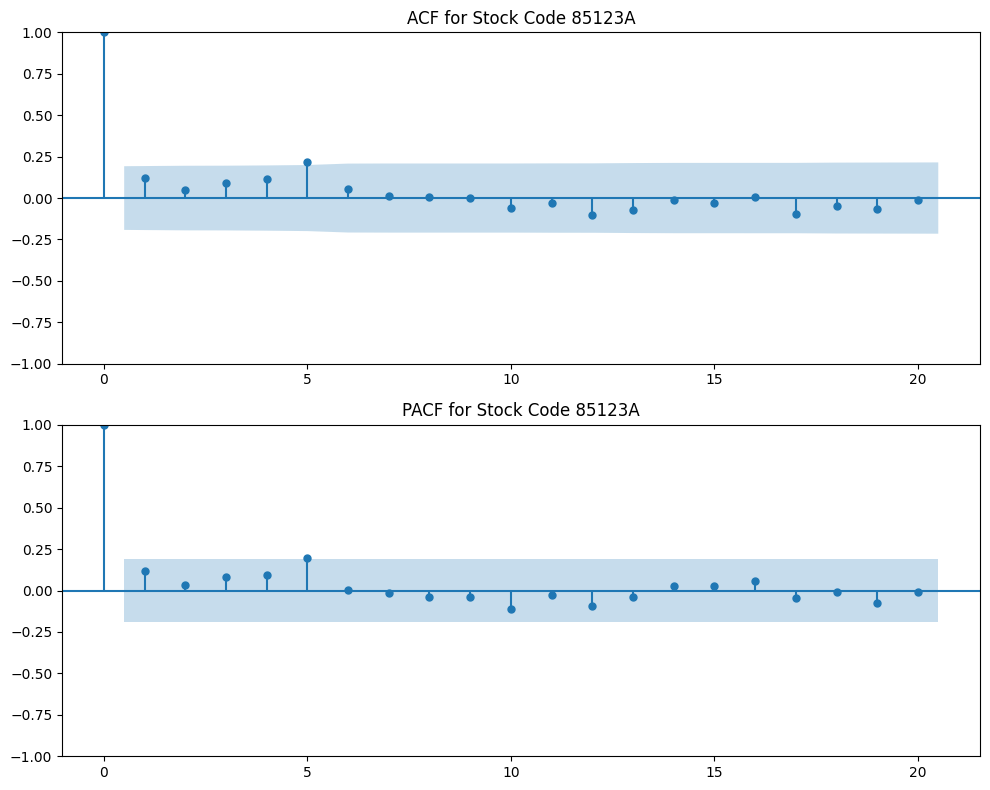

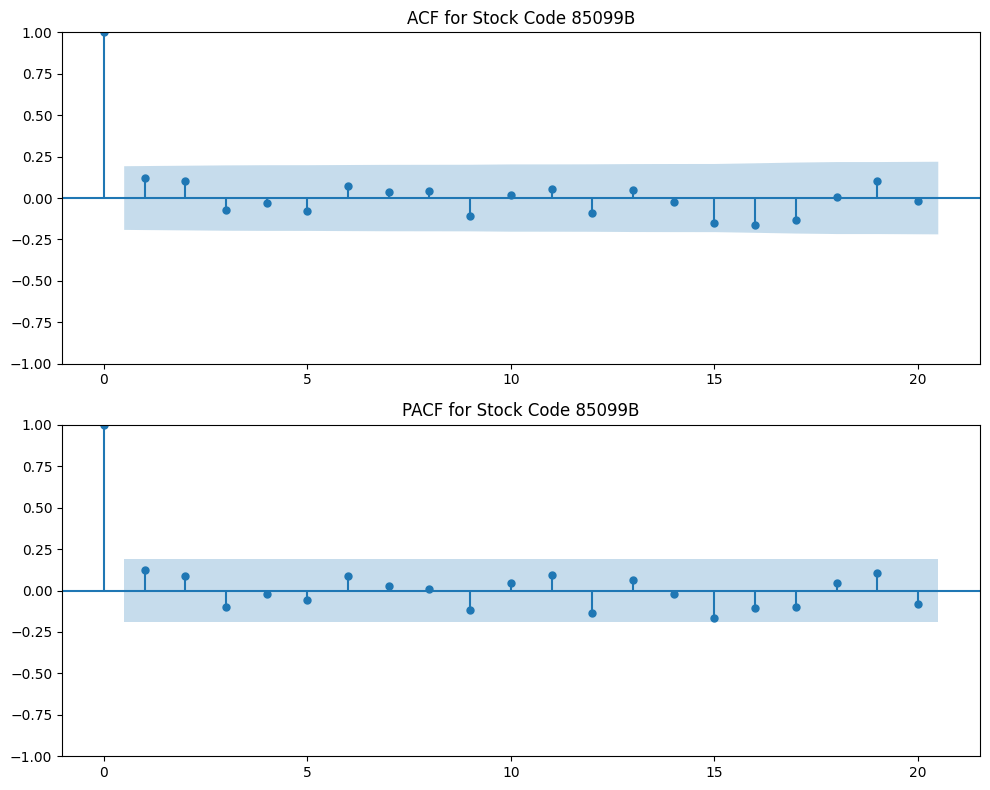

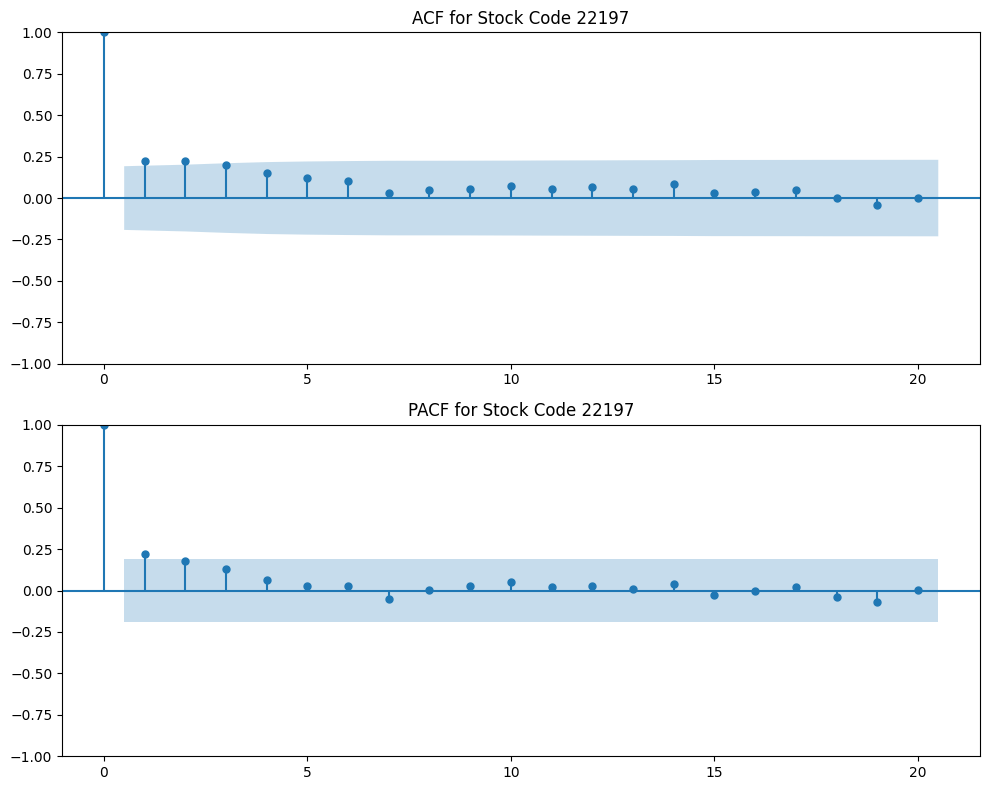

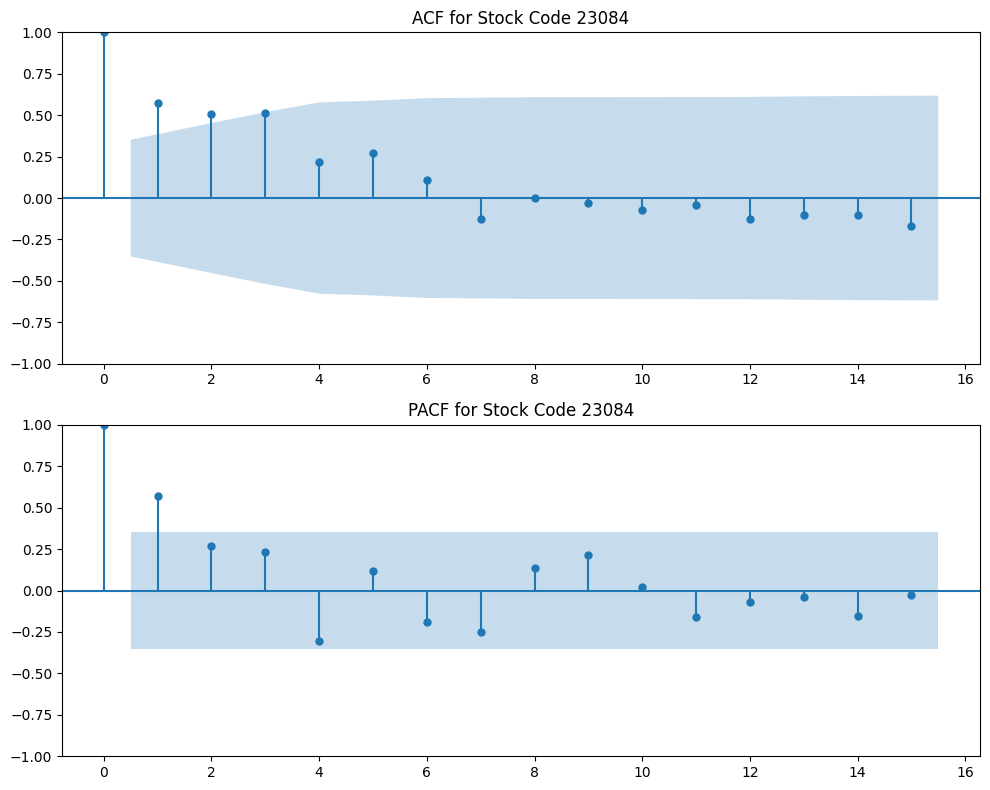

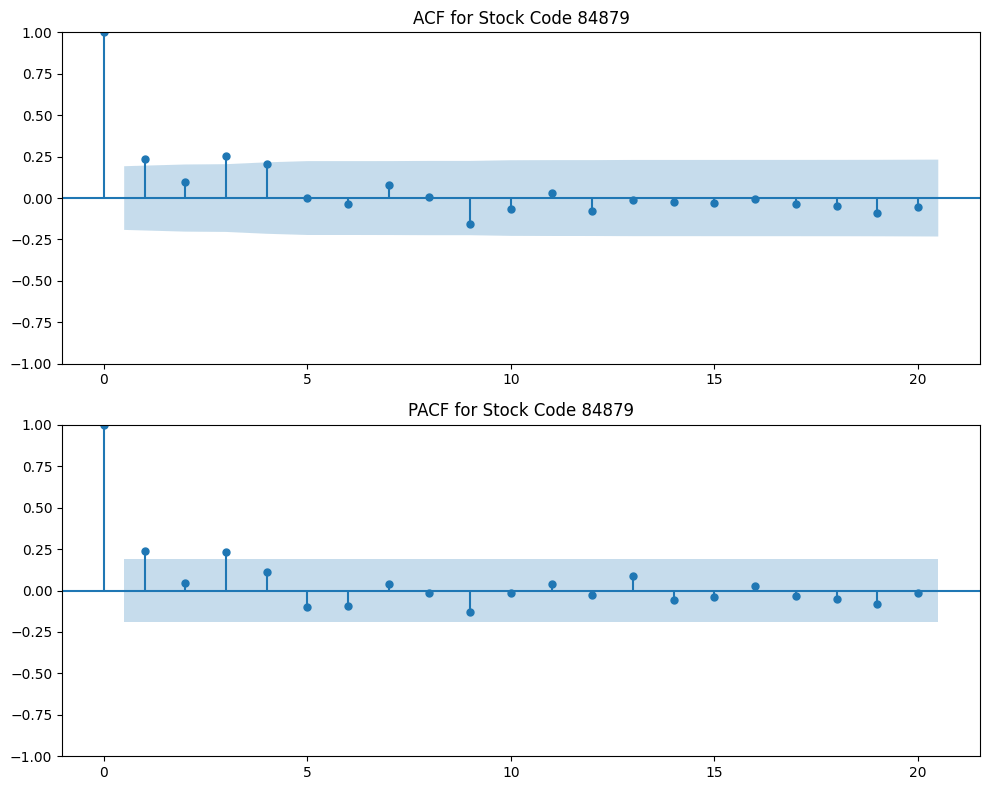

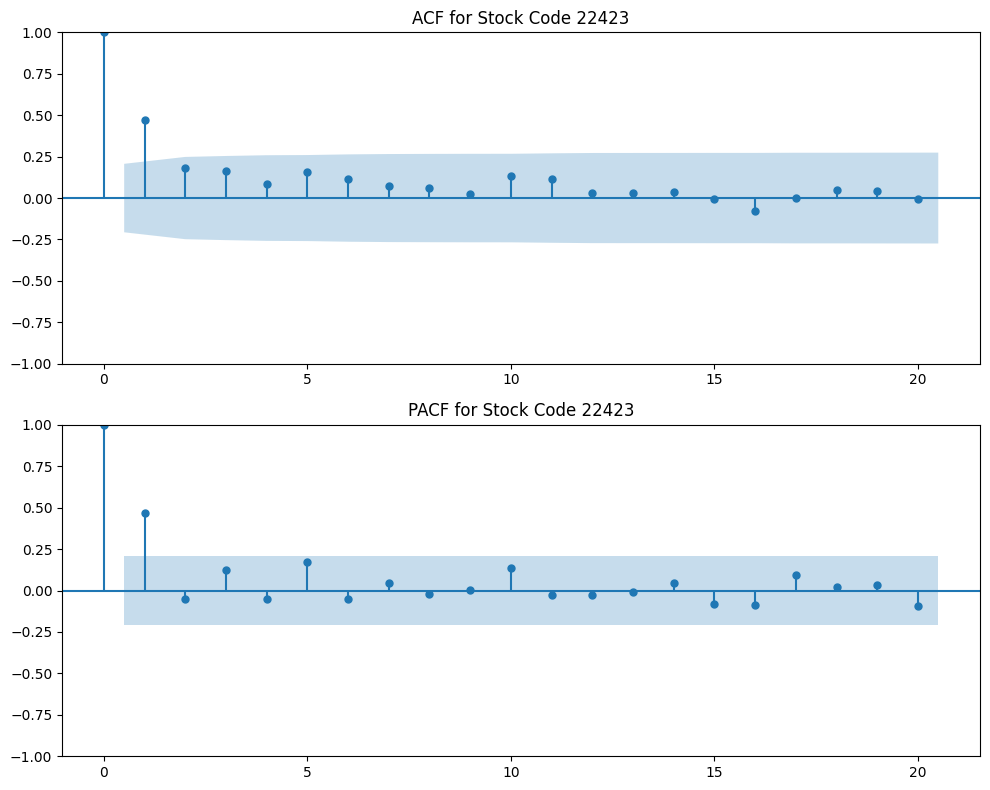

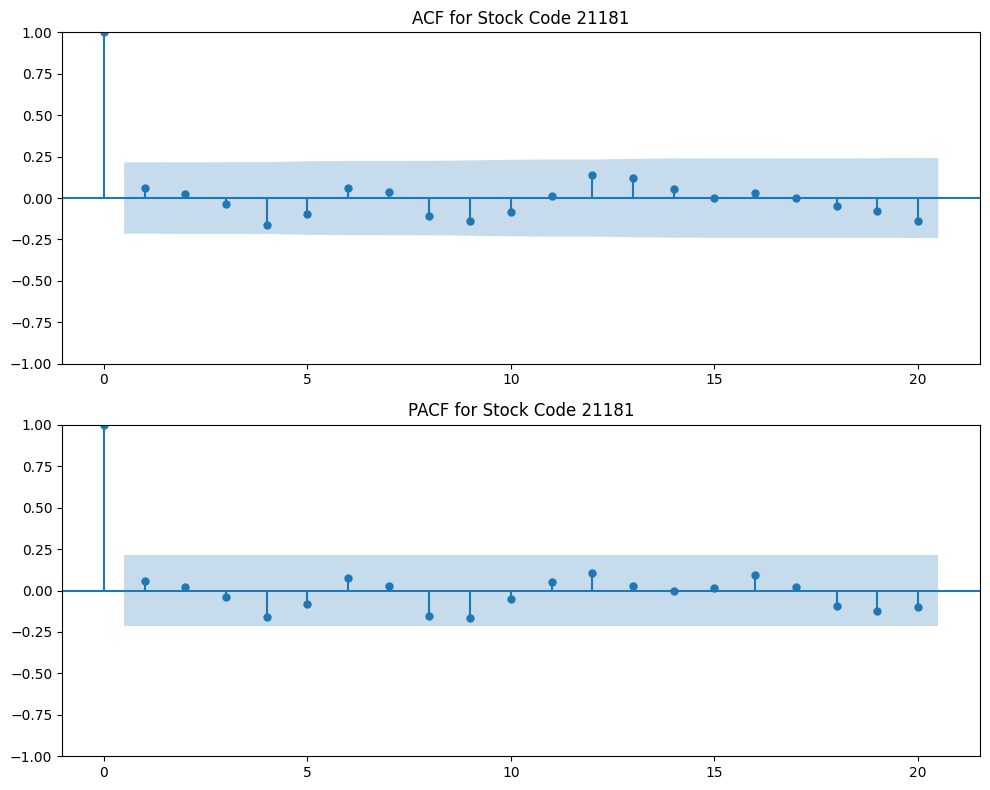

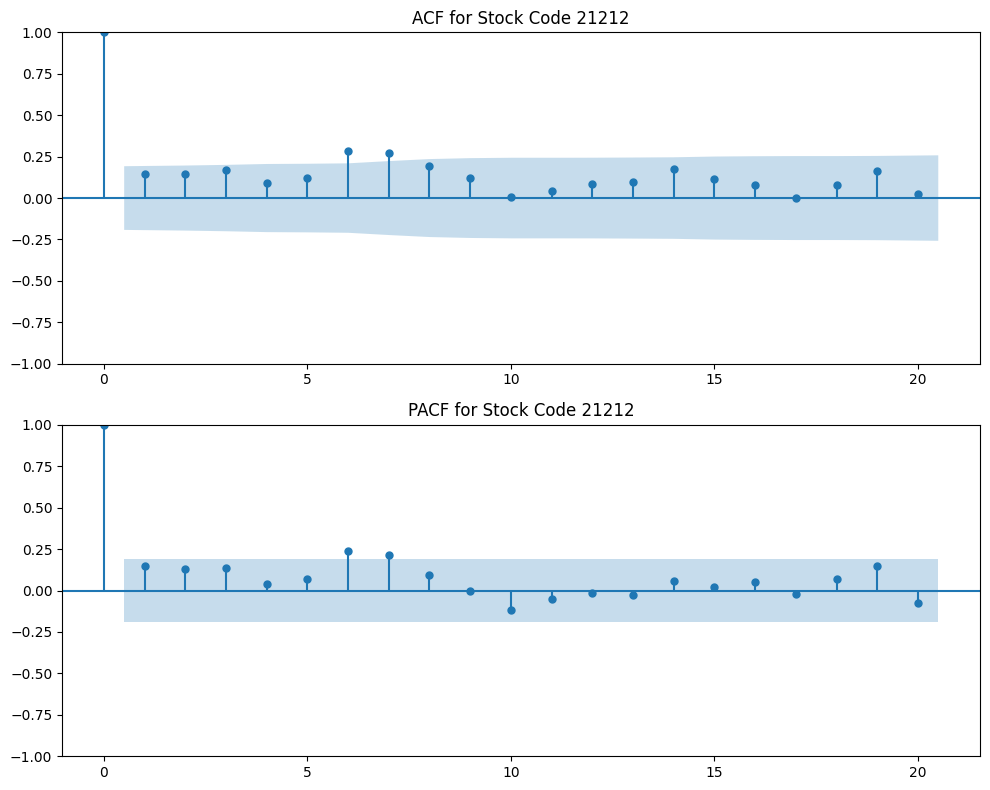

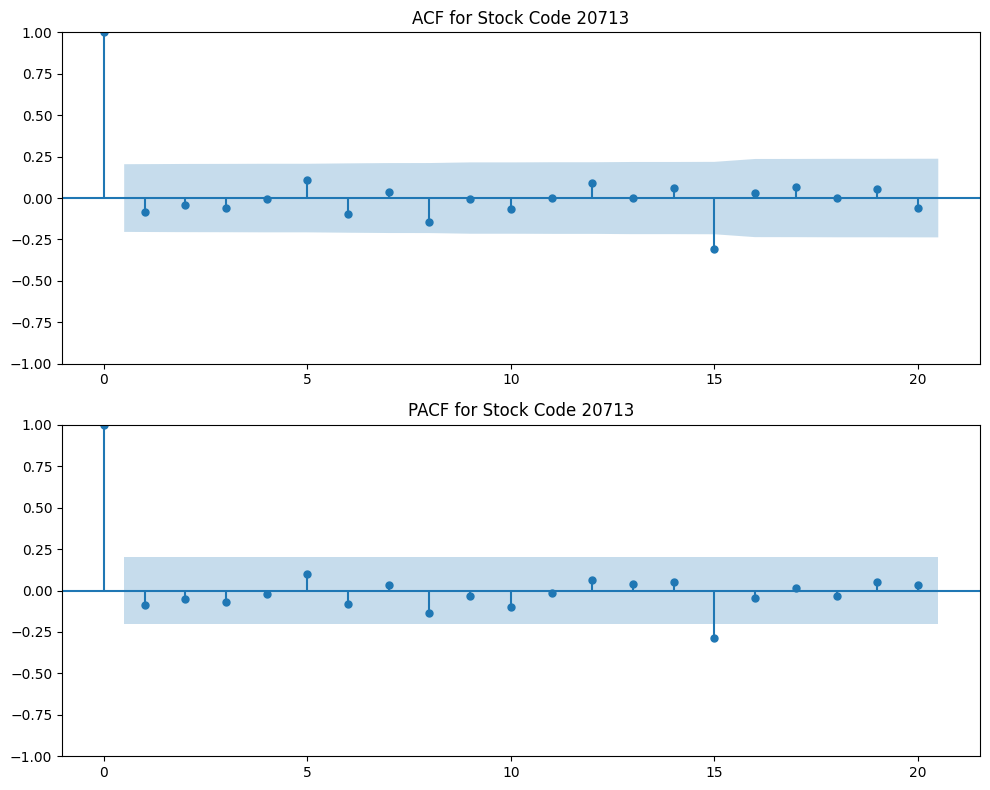

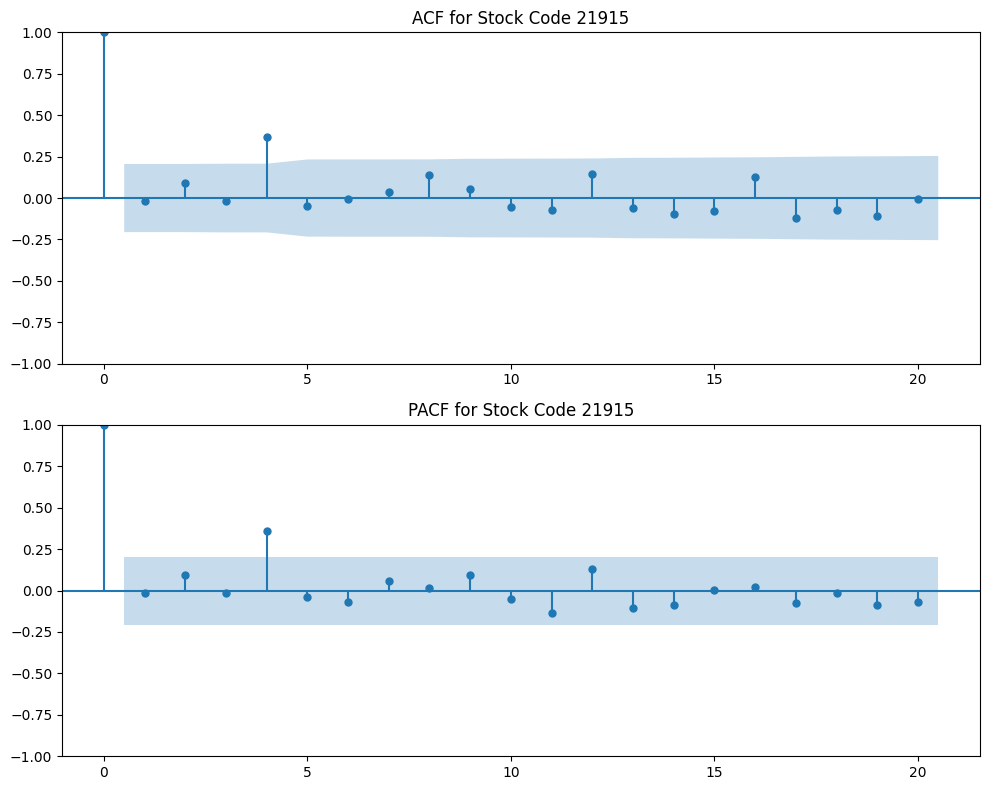

In [182]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

for stock_code in top_10_stock_codes:
   
    product_data = weekly_demand[weekly_demand['StockCode'] == stock_code].set_index('InvoiceDate')
    product_quantity = product_data['Quantity']
    
    n_obs = len(product_quantity)
    
    max_lags = min(20, n_obs // 2)

    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    
    # ACF plot
    sm.graphics.tsa.plot_acf(product_quantity, lags=max_lags, ax=ax[0])
    ax[0].set_title(f'ACF for Stock Code {stock_code}')
    
    # PACF plot
    sm.graphics.tsa.plot_pacf(product_quantity, lags=max_lags, ax=ax[1])
    ax[1].set_title(f'PACF for Stock Code {stock_code}')
    
    plt.tight_layout()
    plt.show() 


In [183]:
model.eval()
#predictions on the validation set
with torch.no_grad():
    val_predictions = model(X_val_tensor).numpy()  

actual_values = y_val 

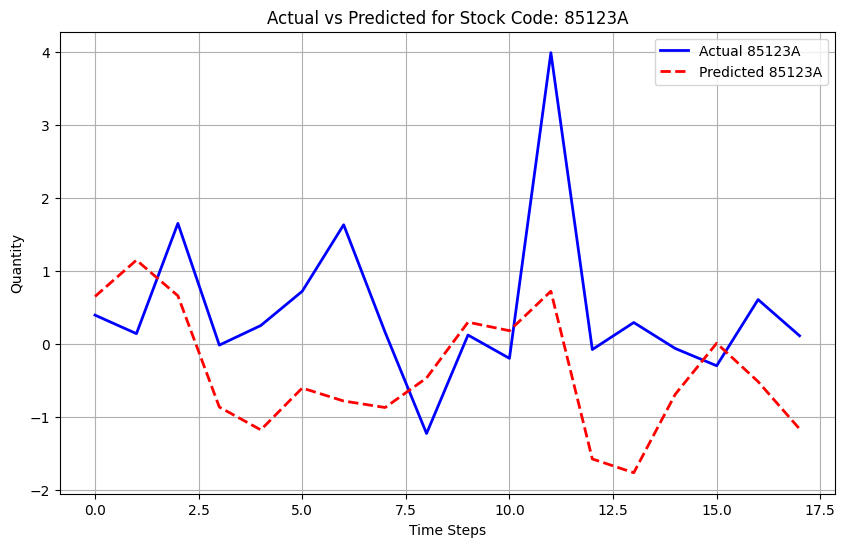

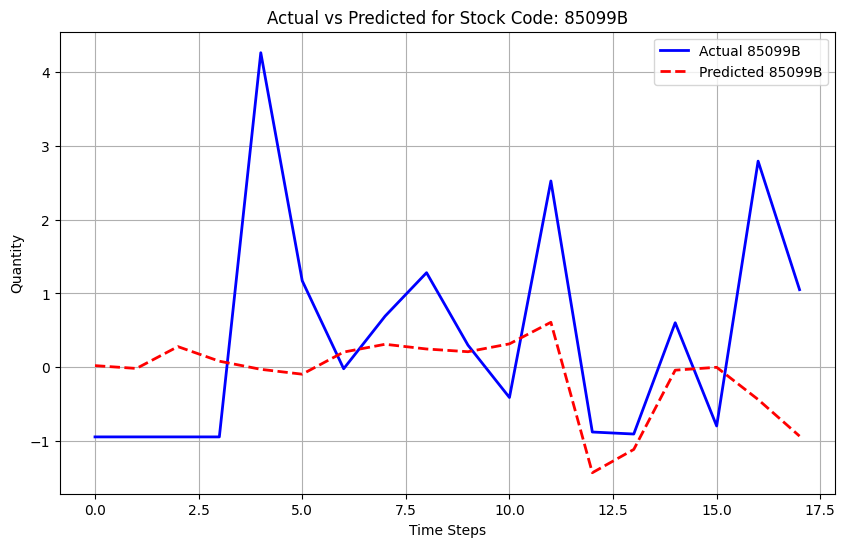

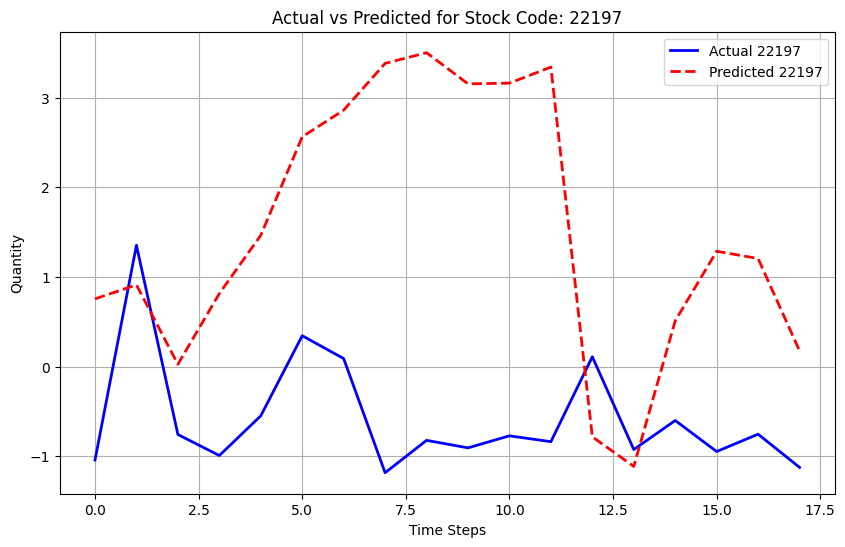

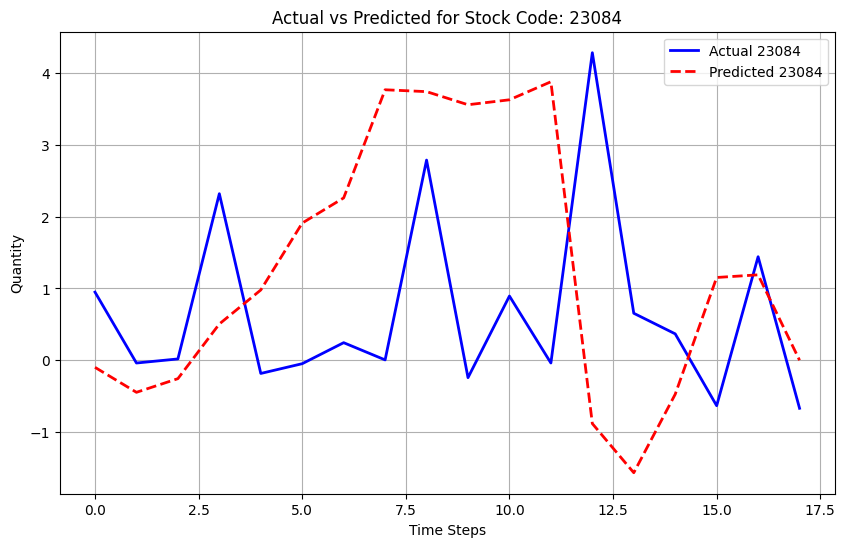

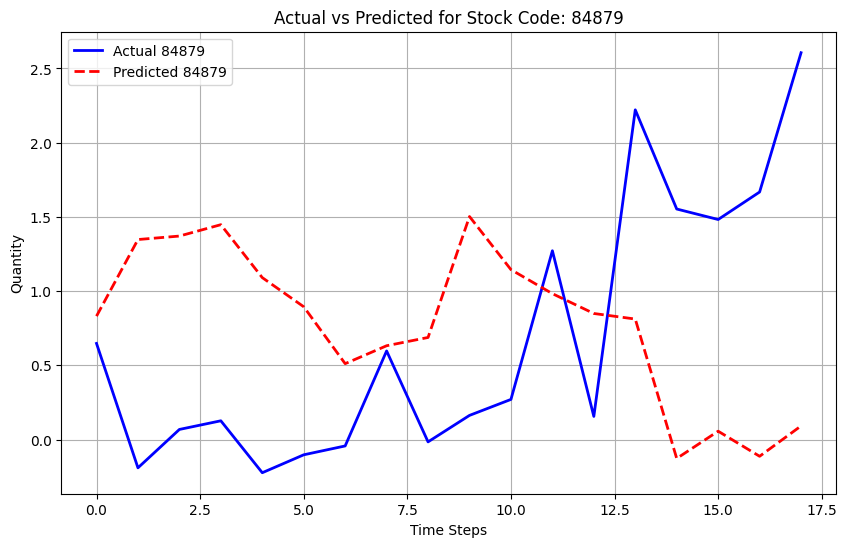

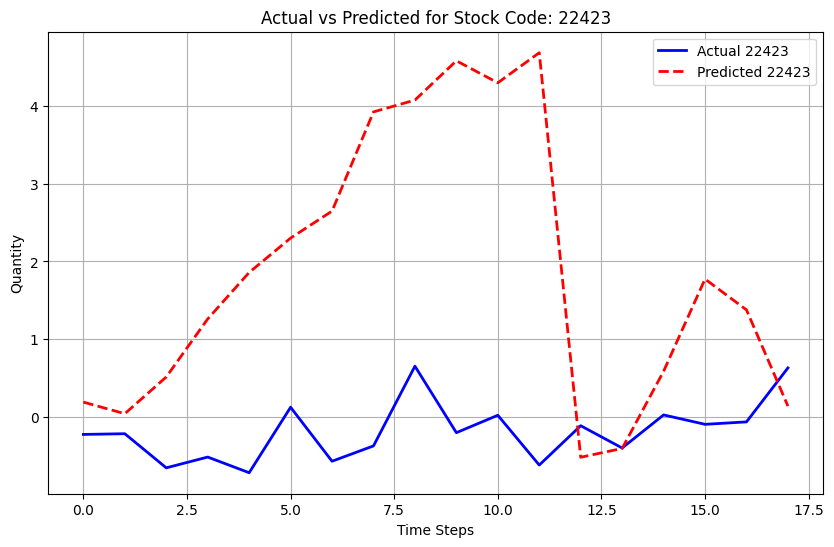

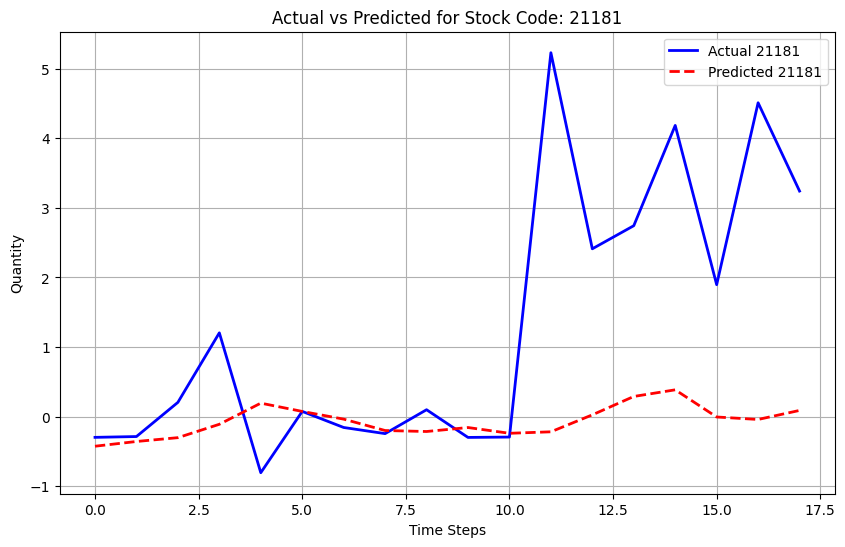

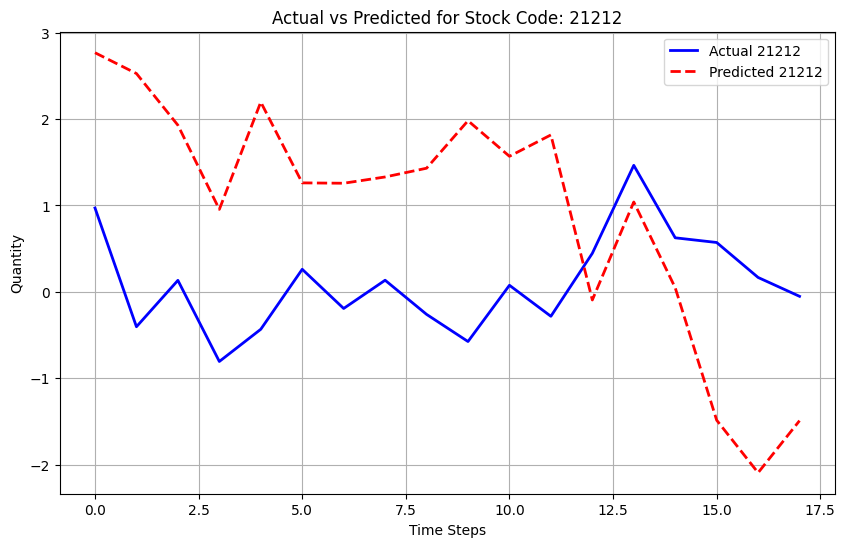

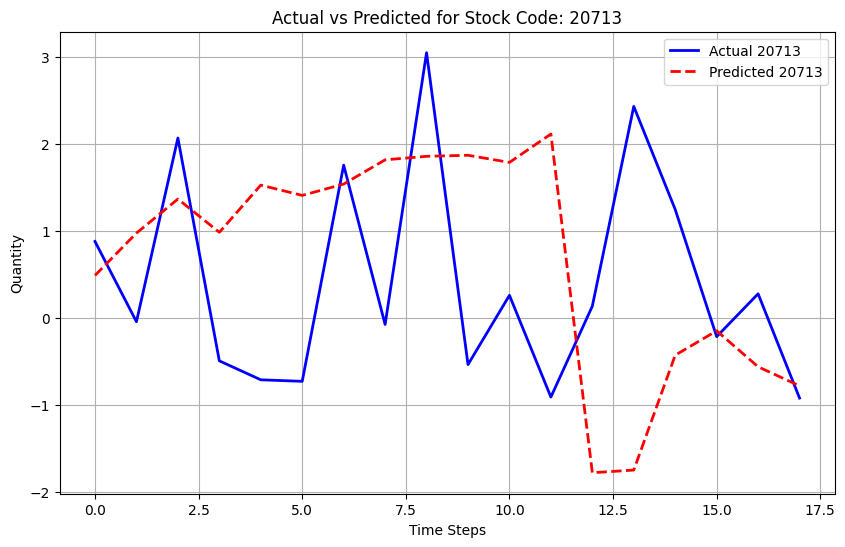

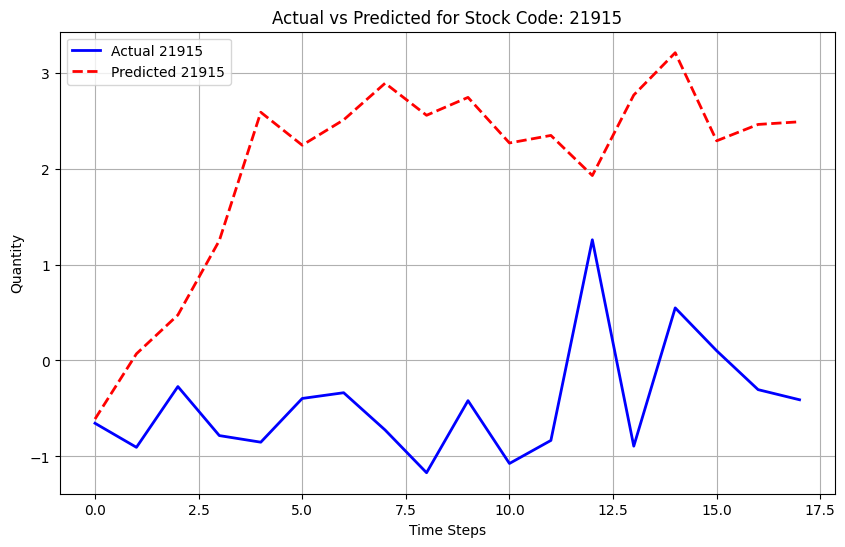

In [184]:
# the actual vs predicted values 
for i, stock_code in enumerate(top_10_products):
    plt.figure(figsize=(10, 6)) 
    plt.plot(actual_values[:, i], label=f'Actual {stock_code}', color='blue', linewidth=2)
    plt.plot(val_predictions[:, i], label=f'Predicted {stock_code}', color='red', linestyle='--', linewidth=2)
    plt.title(f'Actual vs Predicted for Stock Code: {stock_code}')
    plt.ylabel('Quantity')
    plt.xlabel('Time Steps')
    plt.legend()
    plt.grid(True)
    plt.show() 

In [94]:
# Save the model
torch.save(model.state_dict(), 'lstm_model.pth')

In [95]:
# Save the DataFrame
merged_data_algorithm.to_csv('merged_data_algorithm.csv', index=False)
